# K-means

1. 随机布设 K 个特征空间内的点作为初始的聚类中心
2. 根据每个数据的特征向量，从 K 个聚类中心中寻找距离最近的一个，并把该数据标记为从属于这个聚类中心
3. 所有数据都被标记过后，根据这些新的类簇，重新对 K 个聚类中心做计算
4. 如果一轮下来，所有的数据点从属的聚类中心与上一次的分配的类簇没有变化，那么迭代终止。否则回到第 2 步。

**数据描述**

https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/

训练集：3823，测试集：1797

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
digits_train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)
digits_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes", header=None)

In [9]:
# 列 64 是标签
digits_train

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
5,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2
6,0,0,1,11,13,11,7,0,0,0,...,0,0,0,1,13,5,0,0,0,5
7,0,0,8,10,8,7,2,0,0,1,...,0,0,0,4,13,8,0,0,0,5
8,0,0,15,2,14,13,2,0,0,0,...,0,0,0,10,12,5,0,0,0,0
9,0,0,3,13,13,2,0,0,0,6,...,0,0,0,3,15,11,6,0,0,8


In [10]:
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]

In [11]:
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [13]:
from sklearn.cluster import KMeans

# 设置初始的聚类中心数为 10
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)
kmeans_y_predict = kmeans.predict(X_test)

In [14]:
# 对有标签的测试数据进行评估
# 使用 ARI （与分类问题中计算准确性的方法类似）
from sklearn import metrics

print metrics.adjusted_rand_score(y_test, kmeans_y_predict)

0.667388154392


# 如果仅仅是聚类，如何评价聚类效果

## 轮廓系数（Silhouette Coefficient）

同时兼顾了聚类的凝聚度（Cohesion）和分离度（Separation），取值范围在[-1, 1]，轮廓系数越大，聚类效果越好。

**计算步骤：**

1. 取样本$x^i$，计算$x^i$与其同一个类簇内其他样本的距离的平均值，记作$a^i$，用以量化凝聚度（Cohesion）
2. 然后计算$x^i$与其他类簇的距离（$x^i$与其他一个类簇内的所有点的距离的平均值），离它最近的哪个类簇的距离，记为$b^i$，用以量化分离度
3. 则样本$x^i$的轮廓系数为：$sc^i = \frac{b^i - a^i}{max(b^i, a^i)}$
4. 最后对所有样本求出平均值，即为当前聚类结果的整体轮廓系数

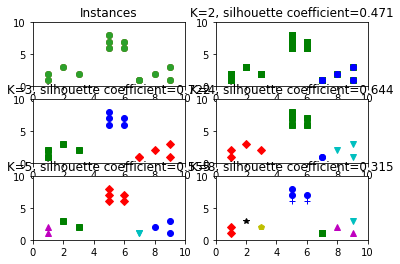

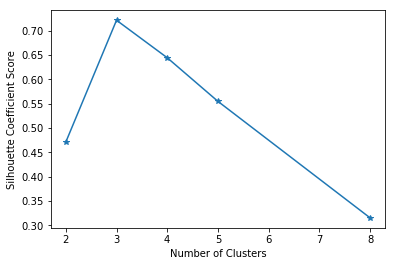

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 3 行 2 列，选定第一个作图
plt.subplot(3, 2, 1)

# 初始化样本点
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])

# 虽然 x1 与 x2 都是 numpy.ndarray 类型，但是 zip 过后，就变为普通的 list
# 所以要用 np.array 再转换一次
X = np.array(zip(x1, x2))

# 在 1 号图上做出原始数据点的分布
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title("Instances")
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

clusters = [2, 3, 4, 5, 8]
subplot_counter = 1
sc_scores = []

for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    
    kmeans_model = KMeans(n_clusters=t).fit(X)
    
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
        
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)

    plt.title("K=%s, silhouette coefficient=%0.03f" % (t, sc_score))
    
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.show()